# Table of Contents
1. [Introduction](#intro)
2. [Data Understanding](#data_u)
3. [Data Preprocessing](#data_p)
4. [Data Modeling](#data_m)
5. [Pattern Evaluation](#pattern_eval1)
6. [Discussion](#disc)
7. [Conclusion](#conc)


<a id='intro'></a>
# Introduction
The wine quality dataset originated from red and white variants of the Portuguese "Vinho Verde" wine, including two .csv files for red and white wine, respectively. The purpose of collecting the dataset was initially intended to model the wine quality, as the name suggested. However, from the information of some attributes, color of the wine, either red or white, can be accurately predicted. Author of the dataset generously donated the dataset to the [UC Irvine Machine Learning Repository][1] for the inspired data science enthusiasts.The author also summarized the research result in the form of academic publication as reference.

The "quality" is an ordinal attribute on a scale between 0 and 10. Since the wine is either red or white, it can be modeled using a nominal attribute "red" with a value 1 or 0. The goal of this project is to demonstrate that both "quality" and "red" are highly predictable features using supervised methods including regression and classification. Another merit worthy of highlighting is the wine quality dataset is a relatively small dataset containing only 4898 instances and 11 attributes saving times in loading and training without loss of generality.

In the current notebook, we focus on simplifying machine learning model through feature extraction while still maintaining sufficiently high accuracy. For the wine color prediction, we found that the model could achieve a 98% accuracy while using just 3 features, (```volatile acidity```, ```total sulfur dioxide```,```chlorides```).  For the quality prediction, we could obtain 96% accuracy with 3 features, (```volatile acidity```, ```density```,```alcohol```).  Noted that a customized score calculation was deployed for the quality prediction as the built-in method provided by sklearn could not produce a fair assessment.  

Reference:<br>
<i>P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. [Modeling wine preferences by data mining from physicochemical properties][2]. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.</i>

[1]:https://archive.ics.uci.edu/dataset/186/wine+quality
[2]:http://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf


<a id='data_u'></a>
# Data Understanding

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
red_dir = '/kaggle/input/wine-quality-dataset/winequality-red.csv'
white_dir = '/kaggle/input/wine-quality-dataset/winequality-white.csv'

Data of red wines and white wines are extracted from respective .csv files.

In [4]:
red_wines = pd.read_csv(red_dir, sep=';')
white_wines = pd.read_csv(white_dir, sep=';')

In [5]:
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<a id='data_p'></a>
# Data Preprocessing

To predict the color of wines, we would need to assign a new attribute and concatenate the two loaded dataframes of respecitve wine colors.

<a id='rvw'></a>
<img src="https://blackcdn.blacktailnyc.com/can_ypu_awitch_bacl_between_white_and_red_wine.jpg" style="height:200px" align='right' border='2'/>

In [7]:
red_wines.insert(loc=len(red_wines.columns), column='color_red', value=1)
white_wines.insert(loc=len(white_wines.columns), column='color_red', value=0)

In [8]:
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [9]:
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [10]:
wines = pd.concat([ red_wines, white_wines])

Correlation coefficient visualization can be handy to identify features showing stronger correlation with the target variable, wine color in this case.

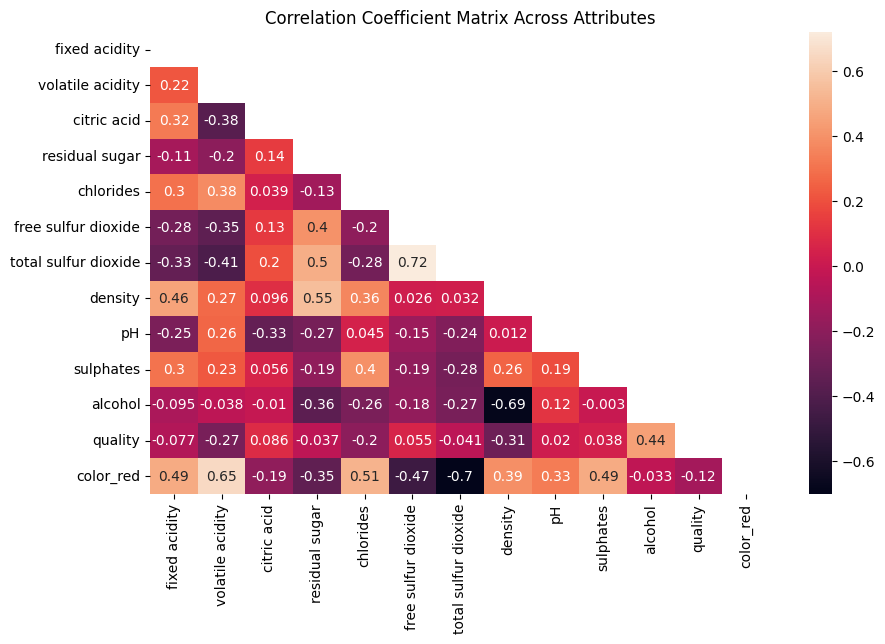

In [11]:
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(wines.corr(), dtype=bool))

sns.heatmap(wines.corr(), annot=True, mask=mask)
plt.title('Correlation Coefficient Matrix Across Attributes')
plt.show()

In [12]:
wines.corr()['color_red'].abs().sort_values(ascending=False)

color_red               1.000000
total sulfur dioxide    0.700357
volatile acidity        0.653036
chlorides               0.512678
sulphates               0.487218
fixed acidity           0.486740
free sulfur dioxide     0.471644
density                 0.390645
residual sugar          0.348821
pH                      0.329129
citric acid             0.187397
quality                 0.119323
alcohol                 0.032970
Name: color_red, dtype: float64

Magnitude of correlation can approximate the feature importance. The top 3 features would be "total sulfur dioxide", "volatile acidity", and "chlorides".

<a id='data_m'></a>
# Data Modeling

Multicollinearity of the attributes can be examined via Variance Inflation Factor (VIF). Attributes with higher VIFs attribute to higher multicollinearity.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [14]:
def vif_cal(df,feature_list):
    
    X = df[feature_list]
    #X['intercept'] = 1
    X = add_constant(X)
    vifs = pd.DataFrame()
    
    vifs["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vifs.index = X.columns
    vifs = vifs[vifs.index!='const']
    return vifs

In [15]:

feature_list = wines.columns
feature_list = feature_list[feature_list!='color_red']
vifs = vif_cal(wines,feature_list)
vifs.sort_values('VIF', ascending=False)

,VIF
density,15.964831
residual sugar,7.308546
alcohol,4.970044
fixed acidity,4.911189
total sulfur dioxide,2.974040
pH,2.545764
free sulfur dioxide,2.156281
volatile acidity,2.037955
chlorides,1.632490
citric acid,1.608690


In [16]:
feature_list_d = feature_list.tolist()
feature_list_d.remove("density")
vifs_d = vif_cal(wines,feature_list_d)
vifs_d.sort_values('VIF', ascending=False)

,VIF
total sulfur dioxide,2.873884
free sulfur dioxide,2.156276
volatile acidity,1.809241
fixed acidity,1.783922
alcohol,1.697222
citric acid,1.608526
chlorides,1.565547
residual sugar,1.532924
pH,1.416984
quality,1.408249


Strong multicollinearity is indicated by VIF>5. By eliminating the "density" feature, VIFs of all attributes are lower than 5.

Since Random Forest Classifier (RFC) generally yielkds great results out-of-the-box without extensive hyperparameter tuning. RFC serves as a good baseline to compare the performance of other more complex models.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

xc_wines = wines.drop(columns=['quality','color_red'])
yc_wines = wines.color_red
                               
xc_train, xc_test, yc_train, yc_test = train_test_split(xc_wines, yc_wines, random_state=42)
                               
model = RandomForestClassifier()
model.fit(xc_train, yc_train)
model.score(xc_test,  yc_test)

0.9956923076923077

Tree-based learning methods further provide an outlook for feature importance after fitting, indicating the extent each feature contributes to effectively splitting and classifying the data.

In [18]:
xc_train.columns
model.feature_importances_

array([0.03765647, 0.10890337, 0.01250318, 0.05820176, 0.26920406,
       0.04879966, 0.32087386, 0.06049498, 0.02207991, 0.05214779,
       0.00913496])

In [19]:
bar_features_df = pd.DataFrame({'features': model.feature_importances_})
bar_features_df.index = xc_train.columns
bar_features_df = bar_features_df.sort_values(by=['features'],ascending=False)


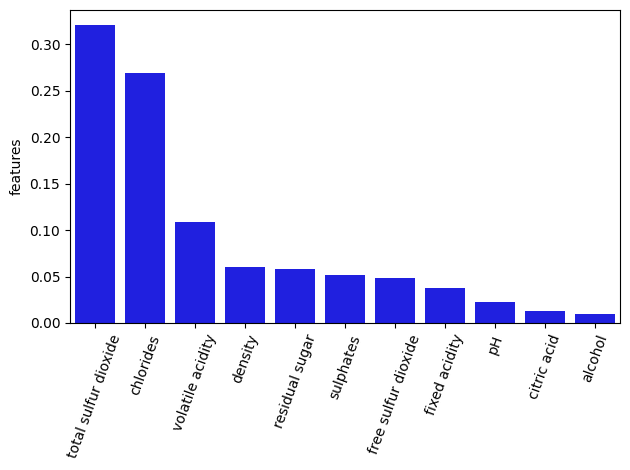

In [20]:
sns.barplot(bar_features_df,x=bar_features_df.index,y='features',color="b")
plt.xticks(rotation=70)
plt.tight_layout()

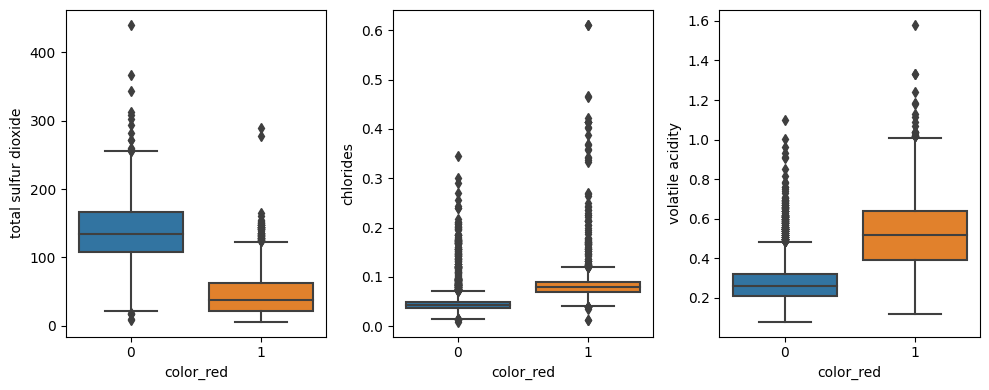

In [21]:
#print(wines['color_red'])

ifs = ["total sulfur dioxide",'chlorides','volatile acidity','color_red']

fig, ax = plt.subplots( 1, 3, figsize=(10,4))
sns.boxplot( ax=ax[0], data=wines, x=ifs[3], y=ifs[0])
sns.boxplot( ax=ax[1], data=wines, x=ifs[3], y=ifs[1])
sns.boxplot( ax=ax[2], data=wines, x=ifs[3], y=ifs[2])

plt.tight_layout();

From the boxplots, red wines generally have lower total sulfur dioxide, higher chlorides, and higher volatile acidity. This result is consistent with the feature importance analysis with slightly different order. 

There are certainly more deterministic factors such as the grape type and the grape skin contact during fermentation to affect the wine color. However, this information is not provided in the wine quality dataset as the primary goal was not to identify the wine color but to predict the wine quality. That said, in this study, we will show that the attributes of the wine quality dataset are sufficient to accurately predict the wine color.

Here is the breakdown:

Total Sulfur Dioxide:  While not directly affecting color, sulfur dioxide is an antioxidant that can prevent spoilage. Excessive levels of total sulfur dioxide would inhibit color extraction during fermentation, potentially resulting in lighter-colored wines.

Chlorides:  Chlorides are typically a natural plant pigment. Very high chloride content not only can affect a wine's taste and aroma, but also can influence the perceived color.

Volatile Acidity: Since the ionization of anthocyanins is affected by pH, wines with lower pH have redder, more stable colors.

Using these 3 attributes, the reduced model manages to predict the wine color with similar accuracy scores.

<a id='pattern_eval1'></a>
# Pattern Evaluation

Random Forest Claasification on the full model is performed as a benchmark after VIF, correlation coefficient and feature importance. Various machine learning approaches will be compared to identify the one with best accuracy in predicitng the wine colpr and wine quality, respectively. Results will be discussed and conclusion will be drawn based on the observations.

In [22]:
model = RandomForestClassifier()
model.fit(xc_train, yc_train)
model.score(xc_test,  yc_test)

0.9963076923076923

We use the top three important features extracted from the analysis of feature importance to examije the variation in the accuracy score.

In [23]:
important_features = bar_features_df.index[0:3].to_list()

X_red = wines[important_features]
y_red = wines.color_red
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, random_state=42)

rfc_red = RandomForestClassifier()
rfc_red.fit( X_train, y_train)
score_red = rfc_red.score(X_test, y_test)

score_red

0.9870769230769231

Resultant accuracy score from the reduced model is quite close to that of the full model, suggesting the model reduction is effective.

It could be intersting to explore more on various machine learning approaches with the same featured data.

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [25]:
ada = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)
ada.fit( X_train, y_train)
score_ada = ada.score(X_test, y_test)
score_ada

0.9833846153846154

In [26]:
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train, y_train)
score_knn = knc.score(X_test, y_test)
score_knn

0.9532307692307692

In the case of KNN, we found that the accuracy actually drops as the number of neighbors increases. A significant drop in accuracy can be observed in KNN classifier as well.

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svc = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=42))
svc.fit(X_train, y_train)
score_svc = svc.score(X_test, y_test)
score_svc

0.9815384615384616

A variation of SVC, Linear SVC, is implemented for the purpose of comparison. Dual argumet should be set False since the number of samples is way larger than the number of features.

In [28]:
lsvc = make_pipeline(StandardScaler(), LinearSVC(dual = False, random_state=42))
lsvc.fit(X_train, y_train)
score_lsvc = lsvc.score(X_test, y_test)
score_lsvc

0.9649230769230769

In [29]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
score_gnb = gnb.score(X_test,y_test)
score_gnb

0.9446153846153846

In [30]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
score_dtc = dtc.score(X_test,y_test)
score_dtc

0.9784615384615385

<a id='pattern_eval2'></a>
# Pattern Evaluation - 2

Let's get into the 10-scale quality prediction which could be more challenging than the 2-scale color prediction. The dataset could be remodeled with simple modification.

In [31]:
wines_q = wines
wines_q.drop(columns=['color_red'],inplace = True)
wines_q.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


By comparing the important features from the Random Forest Classifier (RFC) and the high correlation attributes, we can conclude the two approaches yield consistent results. Thus, we would directly jump into the feature importance analysis of RFC for the purpose of model reduction.

In [32]:
xq_wines = wines_q.drop(columns=['quality'])
yq_wines = wines_q.quality
                               
xq_train, xq_test, yq_train, yq_test = train_test_split(xq_wines, yq_wines, random_state=42)

In [33]:
rfcq = RandomForestClassifier()
rfcq.fit(xq_train, yq_train)
rfcq.score(xq_test,  yq_test)

0.676923076923077

In [34]:
xq_train.columns
rfcq.feature_importances_

array([0.07449953, 0.10136847, 0.07963875, 0.08422731, 0.08571376,
       0.08616531, 0.08975313, 0.09785767, 0.08330982, 0.08744417,
       0.13002208])

In [35]:
bar_qfeatures_df = pd.DataFrame({'features': rfcq.feature_importances_})
bar_qfeatures_df.index = xq_train.columns
bar_qfeatures_df = bar_qfeatures_df.sort_values(by=['features'],ascending=False)

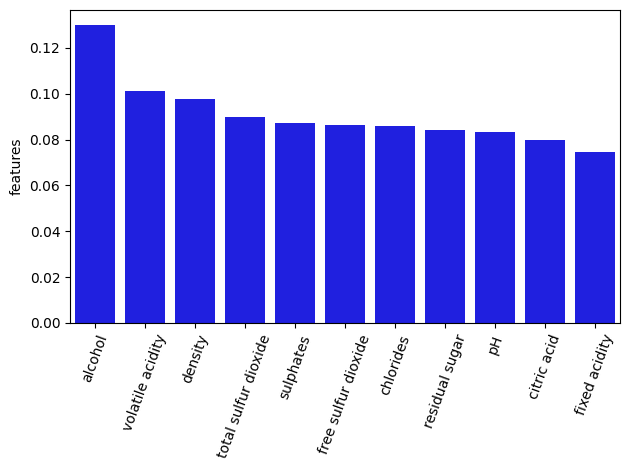

In [36]:
sns.barplot(bar_qfeatures_df,x=bar_qfeatures_df.index,y='features',color="b")
plt.xticks(rotation=70)
plt.tight_layout()

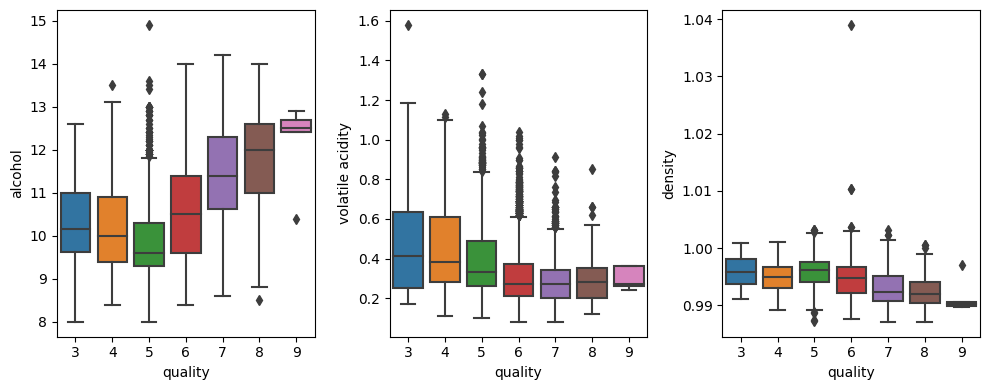

In [37]:
ifs = ['alcohol','volatile acidity','density','quality']

fig, ax = plt.subplots( 1, 3, figsize=(10,4))
sns.boxplot( ax=ax[0], data=wines, x=ifs[3], y=ifs[0])
sns.boxplot( ax=ax[1], data=wines, x=ifs[3], y=ifs[1])
sns.boxplot( ax=ax[2], data=wines, x=ifs[3], y=ifs[2])

plt.tight_layout();

From the boxplot, while negative correlation pattern is clear on volatile acidity and density vs quality, high alcohol concentration can predict high quality wines better.

There are several reasons why alcohol, density, and volatile acidity are often considered dominant factors in predicting wine quality:

Alcohol: Higher alcohol content typically indicates higher initial sugar content in grapes. Through fermentation, yeast converts sugar to alcohol. Wines with higher alcohol content can be perceived as fuller-bodied and have a stronger taste. Alcohol plays a role in balancing the sweetness and acidity of the wine. A well-balanced wine is generally considered to be of higher quality. Alcohol concentration can often be linked to the ripeness of the grapes since ripe grapes tend to have higher sugar content convertable to higher alcohol. Ripe grapes are generally associated with more desirable flavors and aromas.

Density: Density is related to the sugar content in the grape must, the freshly crushed grape juice before fermentation. Higher density often indicates higher sugar content. As indicated above, it can influence the final alcohol content and sweetness of the wine. Density can also be a proxy indirectly measuring the concentration of other grape components like phenolics and flavor compounds. Higher extract concentration can contribute to a more complex and interesting flavor profile, often associated with higher quality wines.

Volatile Acidity: Volatile acidity contributes to the tartness or crispness of the wine. A moderate level of volatile acidity can be desirable for balance and freshness. However, excessively high levels of volatile acidity can be a sign of spoilage caused by bacteria converting alcohol to vinegar. This leads to an unpleasant vinegar aroma and taste, degrading the wine quality.

The issue of score evaluation in the wine prediction is related to the number of scales. To be precise, it has to do with the window of score evaluation. For example, if the actual score is 7, and the score predicted by the classifier is 6, it could be labeled as a "miss", meaning it is considered equally as bad as a 3. Apparently, this is not a fair assessment. Sampling the first 10 entries in the dataset could give a picture.

In [38]:
qc = pd.DataFrame()
qc['prediction']=rfcq.predict(xq_test[0:10])
qc['actual'] = yq_test[0:10].values
qc

,prediction,actual
0,6,8
1,5,5
2,7,7
3,5,6
4,5,6
5,6,6
6,5,5
7,6,6
8,5,5
9,7,7


It could also be the case that the score tolerance is lower than 1, meaning the score is calculated before the final round-off step. Let's try to be more lenient. We may increase the tolerance to be an integer (e.g. +-1, +-2) and see what will happen.

In [39]:
def score_cal( prediction, actual, tolerance):
    good = lambda x : abs(x) <= tolerance
    return (prediction - actual).apply( good ).sum() / len(actual)

print('When the tolerance is', 1, ', score:'+str(score_cal(rfcq.predict(xq_test),yq_test,1)))
print('When the tolerance is', 2, ', score:'+str(score_cal(rfcq.predict(xq_test),yq_test,2)))

When the tolerance is 1 , score:0.9661538461538461
When the tolerance is 2 , score:0.9956923076923077


It is actually not as bad as the original score suggested as the final round-off process could likely take the prediction to a neighboring class. Consider a case where a prediction of 5.3 is rounded off to 5 when the actual quality is 6.

We could also repeat the analysis to extract important features using either correlation coefficient or RFC for the wine quality prediction. However, it may seem to be a bit redundant considering that the accuraccy score is already high if we relax the tolerance to be 1. To save some time and efforts, we omit such steps and directly get into training and testing various machine learning methods. Since we know the built-in score calculation could impose very tight tolerance, we will continue using the self-defined function to customize and assess the score. Set the tolerance to be 1 for all compared methods.

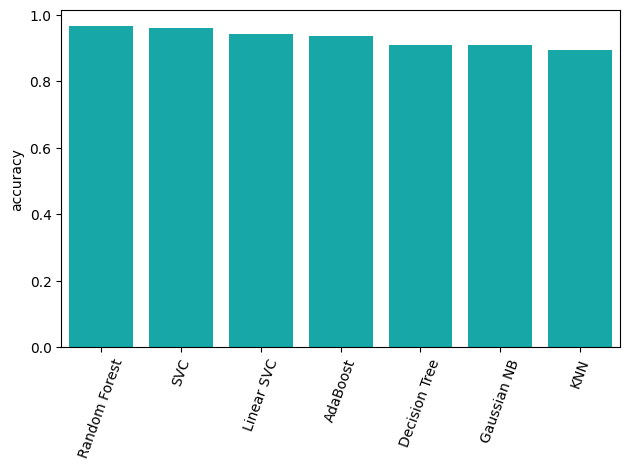

In [40]:
clfs_names = ['Random Forest','AdaBoost','KNN','SVC','Linear SVC',"Gaussian NB","Decision Tree"]

scores_q = []
scoreq_rfc = score_cal(rfcq.predict(xq_test),yq_test,1)
scores_q.append(scoreq_rfc)

ada_q = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)
ada_q.fit( xq_train, yq_train)
scoreq_ada = score_cal(ada_q.predict(xq_test), yq_test, tolerance = 1)

scores_q.append(scoreq_ada)

knc_q = KNeighborsClassifier(n_neighbors=1)
knc_q.fit(xq_train, yq_train)
scoreq_knc = score_cal(knc_q.predict(xq_test), yq_test, tolerance = 1)

scores_q.append(scoreq_knc)


svc_q = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=42))
svc_q.fit(xq_train, yq_train)
scoreq_svc = score_cal(svc_q.predict(xq_test), yq_test, tolerance = 1)
scores_q.append(scoreq_svc)

lsvc_q = make_pipeline(StandardScaler(), LinearSVC(dual = False, random_state=42))
lsvc_q.fit(xq_train, yq_train)
scoreq_lsvc = score_cal(lsvc_q.predict(xq_test), yq_test, tolerance = 1)
scores_q += [scoreq_lsvc]

gnb_q = GaussianNB()
gnb_q.fit(xq_train, yq_train)
scoreq_gnb = score_cal(gnb_q.predict(xq_test), yq_test, tolerance = 1)
scores_q += [scoreq_gnb]

dtc_q = DecisionTreeClassifier(random_state=42)
dtc_q.fit(xq_train, yq_train)
scoreq_dtc = score_cal(dtc_q.predict(xq_test), yq_test, tolerance = 1)
scores_q += [scoreq_dtc]

scores_q

bar_scoresq_df = pd.DataFrame({'accuracy': scores_q})
bar_scoresq_df.index = clfs_names
bar_scoresq_df = bar_scoresq_df.sort_values(by=['accuracy'],ascending=False)

sns.barplot(bar_scoresq_df,x=bar_scoresq_df.index,y='accuracy',color="c")
plt.xticks(rotation=70)
plt.tight_layout()

<a id='disc'></a>
# Discussion

Among machine learning classifiers for wine quality prediction, Random Forest generally achieves superior accuracy compared to Support Vector Machines (SVM), Linear SVC, AdaBoost, Decision Trees, Gaussian Naive Bayes (GNB), and K-Nearest Neighbors (KNN).

Random Forest: This ensemble method combines multiple decision trees, thus reducing variance and achieving higher accuracy. It can handle complex relationships between features and the target variable (wine color or wine quality in this study) without overfitting the data.

Support Vector Classifier (SVC) and Linear SVC: While powerful for classification tasks, SVMs can be less effective with high-dimensional data like the wine quality dataset. They may struggle to find an optimal hyperplane for separation, leading to slightly lower accuracy compared to Random Forest. Linear SVC, a specific type of SVM with a linear kernel, can be even more limited in capturing complex non-linear relationships within the data.

AdaBoost: This algorithm iteratively trains weak learners (decision trees) and focuses on improving the classification of previously misclassified instances. While effective, it can be susceptible to noisy data and might not achieve the same level of accuracy as Random Forest on the wine quality dataset.

Decision Trees:  Decision trees are interpretable but can suffer from overfitting, especially on smaller datasets. They may not capture the full complexity of the relationships between features in the wine quality data.

Gaussian Naive Bayes (GNB): This classifier assumes features are independent, which may not hold true for all features in the wine quality dataset. This independence assumption can lead to less accurate predictions due to high multicollinearity in the dataset compared to models that can capture interactions between features.

K-Nearest Neighbors (KNN): KNN relies on the similarity of data points to classify new instances. In high-dimensional datasets like wine quality, the "curse of dimensionality" can impact performance. The distance metric used in KNN might not effectively capture the relevant relationships between features, leading to lower accuracy.

<a id='conc'></a>
# Conclusion

In this study, we used various machine learning classifiers to predict the wine colpr and wine quality. We also identify the important features to create reduced model with sufficient;y accuracy. While VIFs can be used to eliminate the multicollinearity, it doesn't necessarily lead to higher prediction accuracy since the wine quality dataset isn't a dataset whose attributes follow the assumptions of linear regression. The resolution window can also greaatly influence the accuracy score calculation as shown in this study. As DTSA 5509 is the first course in machine learning specialization, this study lays a solid foundation for supervised learning by looking into the classification problem and the issues arised during the prediction.